Process ID: 1883
Simulation starts ...
Simulation Completed!
Simulation took 42.09856986999512 sec.


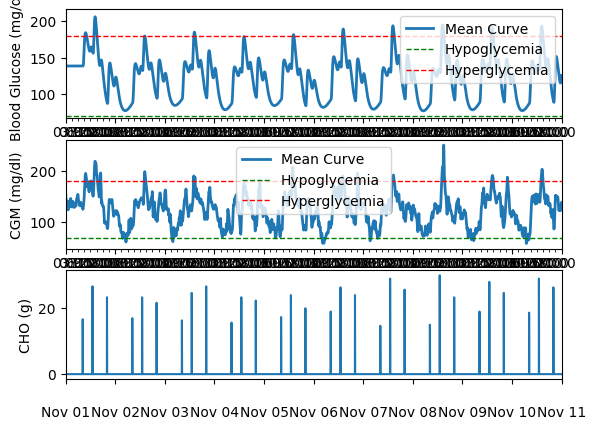

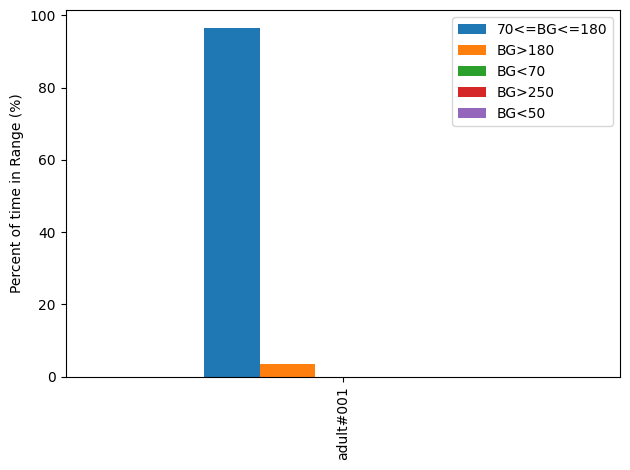

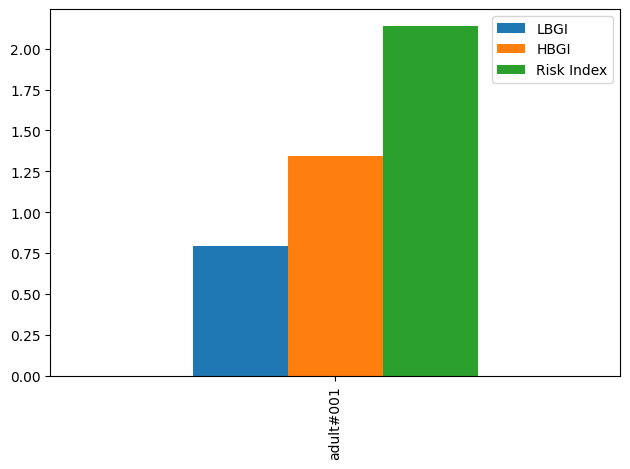

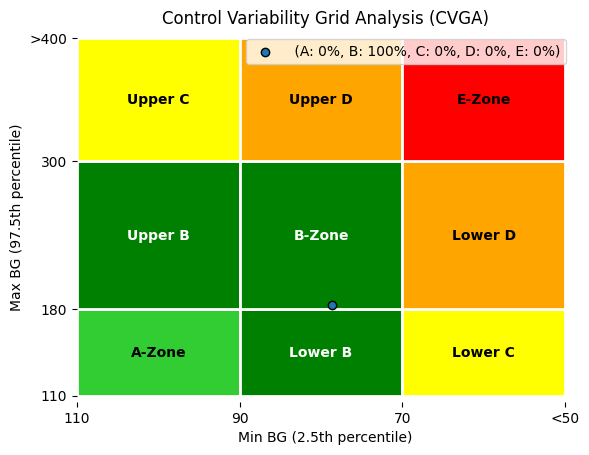

In [80]:
# HOMOGENEOUS SIMULATION

from simglucose.simulation.user_interface import simulate
from simglucose.simulation.scenario import CustomScenario
from datetime import datetime, timedelta
import pandas as pd
from simglucose.controller.basal_bolus_ctrller import BBController


start_time = datetime.now().replace(day=1, month=11, year=2024, hour=0, minute=0, second=0, microsecond=0)

adults = ['adult#001']

import random
days = 10
meals = [
    (start_time + timedelta(hours=8) + timedelta(minutes=15), 50.0),  # Esmorzar
    (start_time + timedelta(hours=13), 80.0), # Dinar
    (start_time + timedelta(hours=20), 70.0)  # Sopar
]
for i, day in enumerate(range(1, days+1)):
    meals.append(
        (start_time + timedelta(days=i, hours=8) + timedelta(minutes=15), 50.0+random.randint(-10, 10)))
    meals.append(
        (start_time + timedelta(days=i, hours=13), 80.0 + random.randint(-10, 10)))
    meals.append(
        (start_time + timedelta(days=i, hours=20), 70.0 + random.randint(-10, 10))
    )

scenario = CustomScenario(start_time=start_time, scenario=meals)

results = simulate(animate=False, 
                   parallel=False,
                   sim_time=timedelta(days=10),
                   patient_names=adults,
                   cgm_name='Dexcom',
                   controller=BBController(),
                   insulin_pump_name='Insulet',
                   cgm_seed=1,
                   scenario=scenario,
                   start_time=start_time,
                   save_path='/Users/danasour/PycharmProjects/GLUSAP/notebooks/results/')



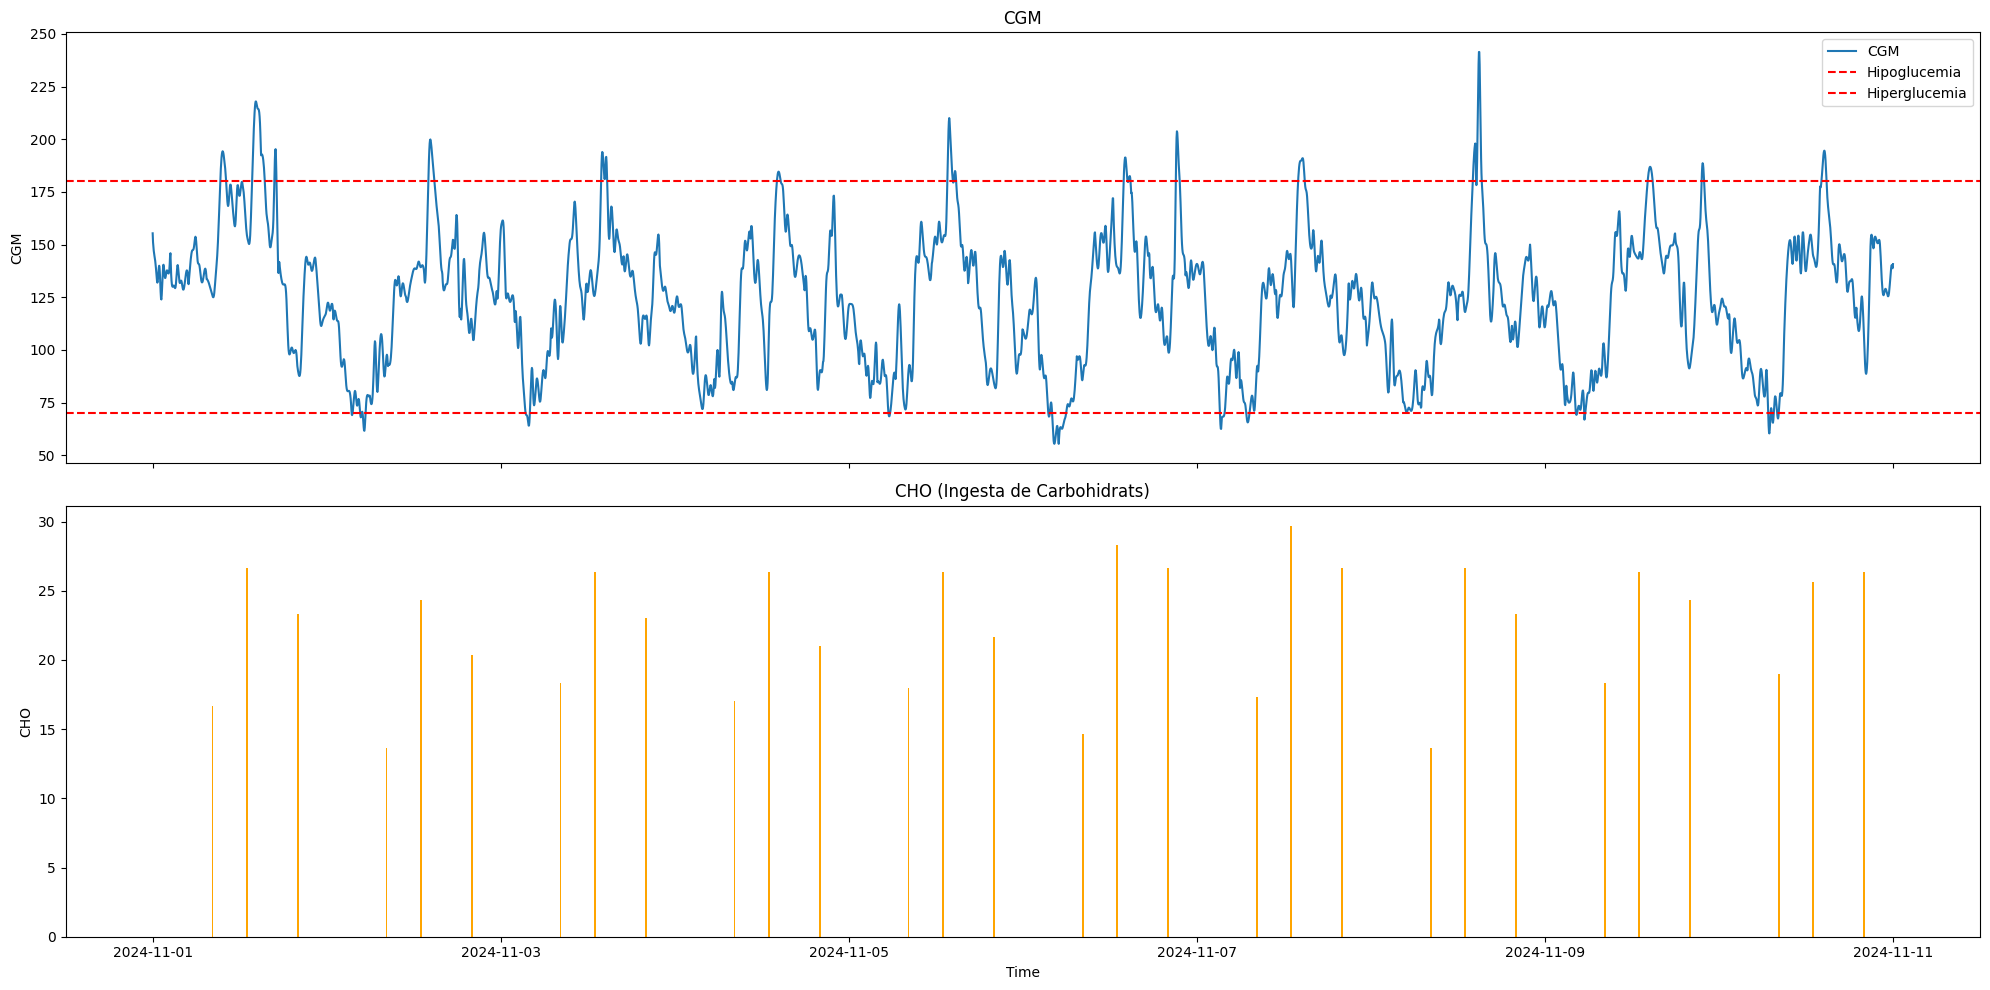

In [20]:

df = pd.read_csv('/Users/danasour/PycharmProjects/GLUSAP/notebooks/results/adult#001.csv')
df['Time'] = pd.to_datetime(df['Time'])

meals = df[df['CHO'] > 0]


import matplotlib.pyplot as plt

hypoglycemia_threshold = 70
hyperglycemia_threshold = 180 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

ax1.plot(df['Time'], df['CGM'], label='CGM')
ax1.axhline(y=hypoglycemia_threshold, color='red', linestyle='--', label='Hipoglucemia')
ax1.axhline(y=hyperglycemia_threshold, color='red', linestyle='--', label='Hiperglucemia')
ax1.set_title('CGM')
ax1.set_ylabel('CGM')
ax1.legend()

ax2.bar(meals['Time'], meals['CHO'], width=0.01, color='orange')
ax2.set_title('CHO (Ingesta de Carbohidrats)')
ax2.set_xlabel('Time')
ax2.set_ylabel('CHO')

plt.tight_layout()
plt.show()




In [18]:

from simglucose.simulation.user_interface import simulate
from simglucose.simulation.scenario import CustomScenario

start_time = datetime.now().replace(day=1, month=11, year=2024, hour=0, minute=0, second=0, microsecond=0)

adults = ['adult#002']

import random
random.seed(300)
days = 10
meals = [
    (start_time + timedelta(hours=8) + timedelta(minutes=15), 50.0),  # Esmorzar
    (start_time + timedelta(hours=13), 80.0), # Dinar
    (start_time + timedelta(hours=20), 70.0)  # Sopar
]

for i, day in enumerate(range(1, days+1)):
    meals.append(
        (start_time + timedelta(days=i, hours=8) + timedelta(minutes=random.randint(-50, 50)), 50.0+random.randint(-10, 30)))
    meals.append(
        (start_time + timedelta(days=i, hours=13) + timedelta(minutes=random.randint(-100, 200)), 80.0 + random.randint(-10, 50)))
    meals.append(
        (start_time + timedelta(days=i, hours=20) + timedelta(minutes=random.randint(-100, 200)), 70.0 + random.randint(-20, 60))
    )
    # Generate random meal
    if random.random() < 0.4:
        meals.append(
            (start_time + timedelta(days=i, hours=18), 20.0 + random.randint(-1, 20)))
        
    if random.random() < 0.2:
        meals.append(
            (start_time + timedelta(days=i, hours=11), 10.0 + random.randint(-1, 10))
        )
        
        
scenario = CustomScenario(start_time=start_time, scenario=meals)

results = simulate(animate=False,
                     parallel=False,
                     sim_time=timedelta(days=10),
                     patient_names=adults,
                     cgm_name='Dexcom',
                     controller=BBController(),
                     insulin_pump_name='Insulet',
                     cgm_seed=1,
                     scenario=scenario,
                     start_time=start_time,
                     save_path='/Users/danasour/PycharmProjects/GLUSAP/notebooks/results/')


NameError: name 'datetime' is not defined

In [ ]:

df = pd.read_csv('/Users/danasour/PycharmProjects/GLUSAP/notebooks/results/adult#002.csv')
df['Time'] = pd.to_datetime(df['Time'])

meals = df[df['CHO'] > 0]


import matplotlib.pyplot as plt

hypoglycemia_threshold = 70 
hyperglycemia_threshold = 180 


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)

ax1.plot(df['Time'], df['CGM'], label='CGM')
ax1.axhline(y=hypoglycemia_threshold, color='red', linestyle='--', label='Hipoglucemia')
ax1.axhline(y=hyperglycemia_threshold, color='red', linestyle='--', label='Hiperglucemia')
ax1.set_title('CGM')
ax1.set_ylabel('CGM')
ax1.legend()

ax2.bar(meals['Time'], meals['CHO'], width=0.01, color='orange')
ax2.set_title('CHO (Ingesta de Carbohidrats)')
ax2.set_xlabel('Time')
ax2.set_ylabel('CHO')

plt.tight_layout()
plt.show()


Epoch [10/60], Loss: 0.0286
Epoch [20/60], Loss: 0.0192
Epoch [30/60], Loss: 0.0058
Epoch [40/60], Loss: 0.0034
Epoch [50/60], Loss: 0.0029
Epoch [60/60], Loss: 0.0023


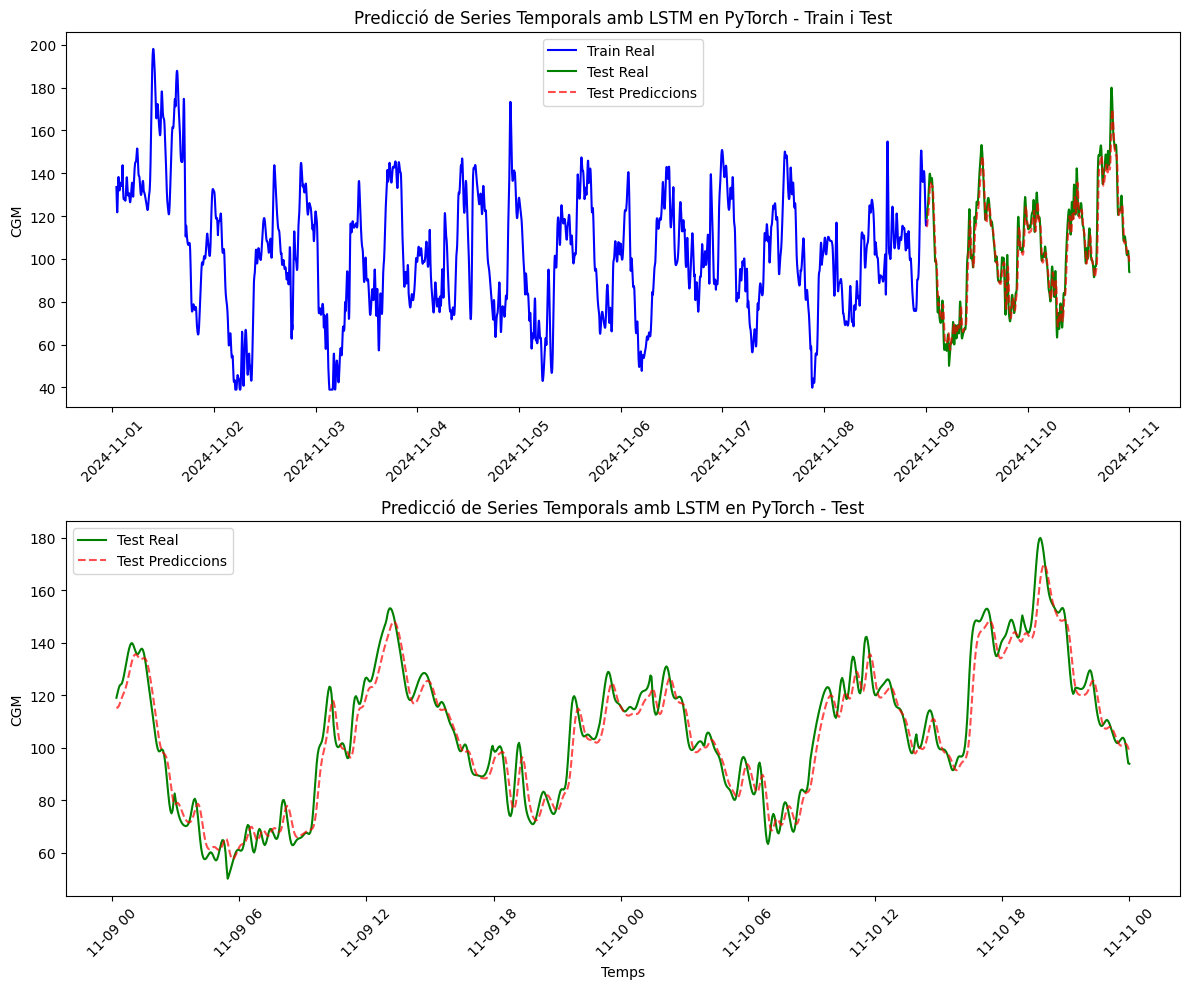

In [21]:

from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

data = pd.read_csv('/Users/danasour/PycharmProjects/GLUSAP/notebooks/results/adult#002.csv')
data['Time'] = pd.to_datetime(data['Time'])


scaler = MinMaxScaler(feature_range=(0, 1))
targets = data['CGM'].values  
targets_normalized = scaler.fit_transform(targets.reshape(-1, 1)).flatten() 


def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 20  # Longitud de la seqüència d'entrada
split_ratio = 0.8  # Percentatge de `train`

X, y = create_sequences(targets_normalized, SEQ_LENGTH)

train_size = int(len(X) * split_ratio)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

X_train_tensor = torch.FloatTensor(X_train).view(-1, SEQ_LENGTH, 1)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test).view(-1, SEQ_LENGTH, 1)
y_test_tensor = torch.FloatTensor(y_test)

class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=2, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(50, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out


model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epochs = 60
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    train_predictions = model(X_train_tensor)
    test_predictions = model(X_test_tensor)

# Invertir la normalització per visualitzar els resultats
train_predictions = scaler.inverse_transform(train_predictions.numpy())
y_train_true = scaler.inverse_transform(y_train_tensor.numpy().reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions.numpy())
y_test_true = scaler.inverse_transform(y_test_tensor.numpy().reshape(-1, 1))

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# Primer subplot - Visualización de Train y Test juntos
ax1.plot(data['Time'][SEQ_LENGTH:train_size+SEQ_LENGTH], y_train_true, label='Train Real', color='blue')
ax1.plot(data['Time'][train_size+SEQ_LENGTH:], y_test_true, label='Test Real', color='green')
ax1.plot(data['Time'][train_size+SEQ_LENGTH:], test_predictions, label='Test Prediccions', linestyle='--', color='red', alpha=0.7)
ax1.legend()
ax1.set_title('Predicció de Series Temporals amb LSTM en PyTorch - Train i Test')
ax1.set_ylabel('CGM')
ax1.tick_params(axis='x', rotation=45)

# Segundo subplot - Solo visualización de Test y Predicciones
ax2.plot(data['Time'][train_size+SEQ_LENGTH:], y_test_true, label='Test Real', color='green')
ax2.plot(data['Time'][train_size+SEQ_LENGTH:], test_predictions, label='Test Prediccions', linestyle='--', color='red', alpha=0.7)
ax2.legend()
ax2.set_title('Predicció de Series Temporals amb LSTM en PyTorch - Test')
ax2.set_xlabel('Temps')
ax2.set_ylabel('CGM')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


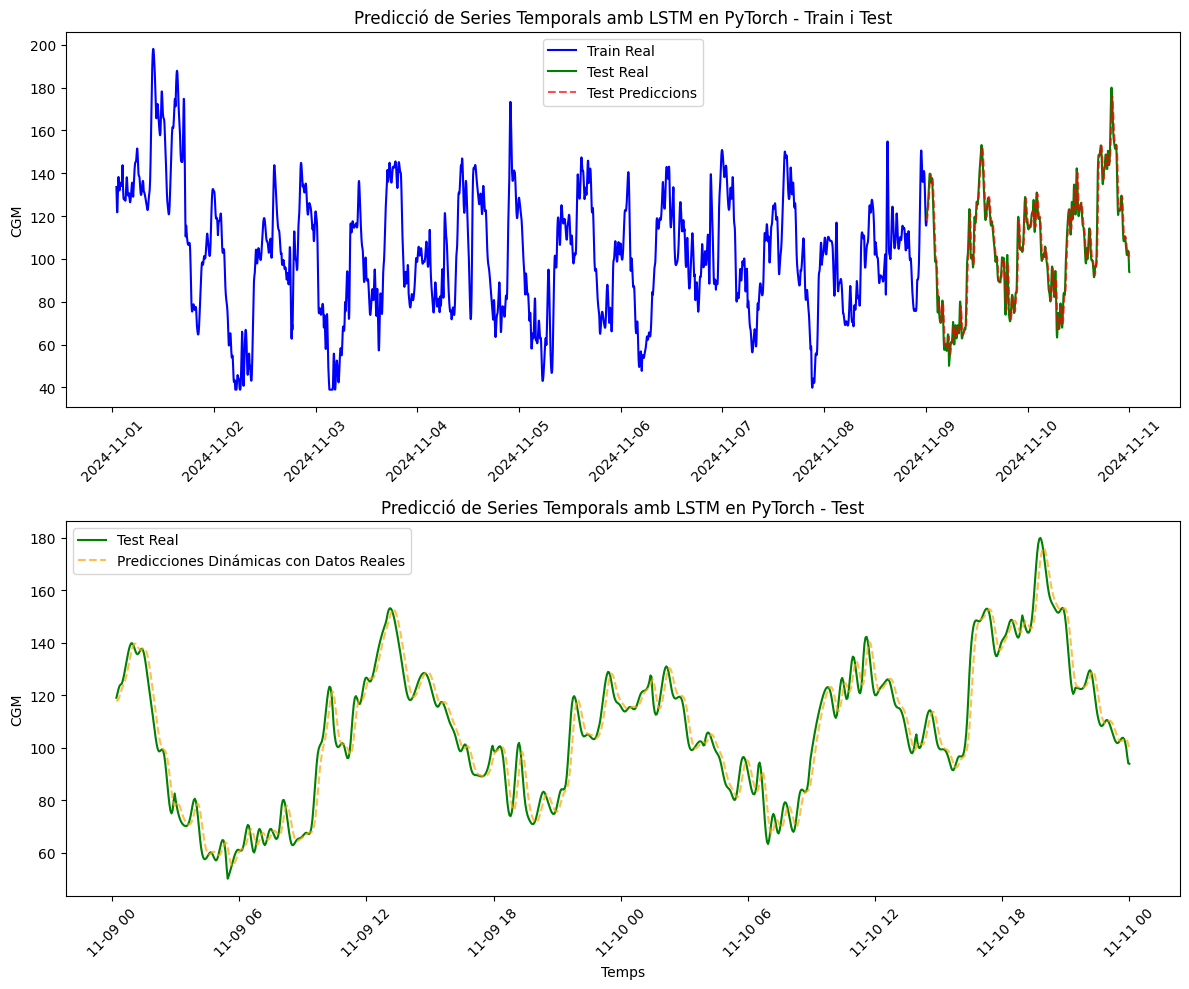

In [68]:
def dynamic_prediction_with_real_data_hourly(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, seq_length, period_duration=20):
    model.eval()

    dynamic_predictions = []

    test_input = X_train_tensor[-1].unsqueeze(0)  # Última secuencia de train
    
    for i in range(0, len(X_test_tensor), period_duration):
        hour_predictions = []
        for j in range(period_duration):
            with torch.no_grad():
                prediction = model(test_input).squeeze()  # Predicción para el siguiente valor
                hour_predictions.append(prediction.item())

            if i + j + 1 < len(X_test_tensor): 
                next_real_value = y_test_tensor[i + j].item()
                test_input = torch.cat((test_input[:, 1:, :], torch.FloatTensor([next_real_value]).view(1, 1, 1)), dim=1)

        dynamic_predictions.extend(hour_predictions)

    return dynamic_predictions

dynamic_test_predictions = dynamic_prediction_with_real_data_hourly(
    model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, SEQ_LENGTH, period_duration=20
)

dynamic_test_predictions = scaler.inverse_transform(np.array(dynamic_test_predictions).reshape(-1, 1))
y_test_true = scaler.inverse_transform(y_test_tensor.numpy().reshape(-1, 1))

if len(dynamic_test_predictions) > len(y_test_true):
    dynamic_test_predictions = dynamic_test_predictions[:len(y_test_true)]

elif len(dynamic_test_predictions) < len(y_test_true):
    missing = len(y_test_true) - len(dynamic_test_predictions)
    dynamic_test_predictions = np.concatenate([dynamic_test_predictions, [np.nan]*missing])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# Primer subplot - Visualización de Train y Test juntos
ax1.plot(data['Time'][SEQ_LENGTH:train_size+SEQ_LENGTH], y_train_true, label='Train Real', color='blue')
ax1.plot(data['Time'][train_size+SEQ_LENGTH:], y_test_true, label='Test Real', color='green')
ax1.plot(data['Time'][train_size+SEQ_LENGTH:], test_predictions, label='Test Prediccions', linestyle='--', color='red', alpha=0.7)
ax1.legend()
ax1.set_title('Predicció de Series Temporals amb LSTM en PyTorch - Train i Test')
ax1.set_ylabel('CGM')
ax1.tick_params(axis='x', rotation=45)

# Segundo subplot - Solo visualización de Test y Predicciones
ax2.plot(data['Time'][train_size+SEQ_LENGTH:], y_test_true, label='Test Real', color='green')
ax2.plot(data['Time'][train_size+SEQ_LENGTH:], dynamic_test_predictions, label='Predicciones Dinámicas con Datos Reales', linestyle='--', color='orange', alpha=0.7)
ax2.legend()
ax2.set_title('Predicció de Series Temporals amb LSTM en PyTorch - Test')
ax2.set_xlabel('Temps')
ax2.set_ylabel('CGM')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [81]:
df = pd.read_csv('/Users/danasour/PycharmProjects/GLUSAP/notebooks/results/adult#001.csv')
df['Time'] = pd.to_datetime(df['Time'])

# Define train 5 days, last 5 days
# Define test 3 days, last 3 days

train = df[df['Time'] > df['Time'].max() - pd.Timedelta(days=8)]
test = train[train['Time'] > train['Time'].max() - pd.Timedelta(days=3)]
train = train[~train['Time'].isin(test['Time'])]

# Group BG levels by Date_Hour in both dfs.
train_grouped_df = train.copy()
test_grouped_df = test.copy()

import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
train_grouped_df['CGM'] = scaler.fit_transform(train_grouped_df[['CGM']])
test_grouped_df['CGM'] = scaler.transform(test_grouped_df[['CGM']])

train_grouped_df.set_index('Time', inplace=True)

train_grouped_df = train_grouped_df['CGM'].resample('15T').mean()

test_grouped_df.set_index('Time', inplace=True)

test_grouped_df = test_grouped_df['CGM'].resample('15T').mean()

train_grouped_series = pd.Series(train_grouped_df)
test_grouped_series = pd.Series(test_grouped_df)

import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import mean_squared_error

pdq = (4, 0, 3)  
PDQm = (1, 1, 1, 96) 


test = test_grouped_df.copy()
train = train_grouped_df.copy()


train_model = sm.tsa.SARIMAX(train, order=pdq, seasonal_order=PDQm)
train_model_fit = train_model.fit()


/var/folders/mc/zlqytgf56zgf5kg0s1ld980m0000gn/T/ipykernel_1883/3713885970.py:28: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  train_grouped_df = train_grouped_df['CGM'].resample('15T').mean()
/var/folders/mc/zlqytgf56zgf5kg0s1ld980m0000gn/T/ipykernel_1883/3713885970.py:33: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  test_grouped_df = test_grouped_df['CGM'].resample('15T').mean()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.05232D+00    |proj g|=  1.43760D+00


 This problem is unconstrained.



At iterate    5    f= -1.05606D+00    |proj g|=  3.20783D-01

At iterate   10    f= -1.06593D+00    |proj g|=  4.42951D-01

At iterate   15    f= -1.06998D+00    |proj g|=  5.98708D-01

At iterate   20    f= -1.07470D+00    |proj g|=  5.51935D-01

At iterate   25    f= -1.09676D+00    |proj g|=  9.50949D-01

At iterate   30    f= -1.12949D+00    |proj g|=  2.00561D-01

At iterate   35    f= -1.13236D+00    |proj g|=  5.37434D-03

At iterate   40    f= -1.13248D+00    |proj g|=  1.95042D-02

At iterate   45    f= -1.13272D+00    |proj g|=  1.71177D-02

At iterate   50    f= -1.13277D+00    |proj g|=  5.60976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/danasour/Library/Caches/pypoetry/virtualenvs/glusap-WFOim_Bi-py3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/Users/danasour/Library/Caches/pypoetry/virtualenvs/glusap-WFOim_Bi-py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/Users/danasour/Library/Caches/pypoetry/virtualenvs/glusap-WFOim_Bi-py3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)



Test MSE: 0.010

Total train and predict time 432000.0


/var/folders/mc/zlqytgf56zgf5kg0s1ld980m0000gn/T/ipykernel_1883/3442170019.py:48: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  forecast_index = pd.date_range(start=test.index[-1] + pd.Timedelta(minutes=15), periods=forecast_steps, freq='15T')


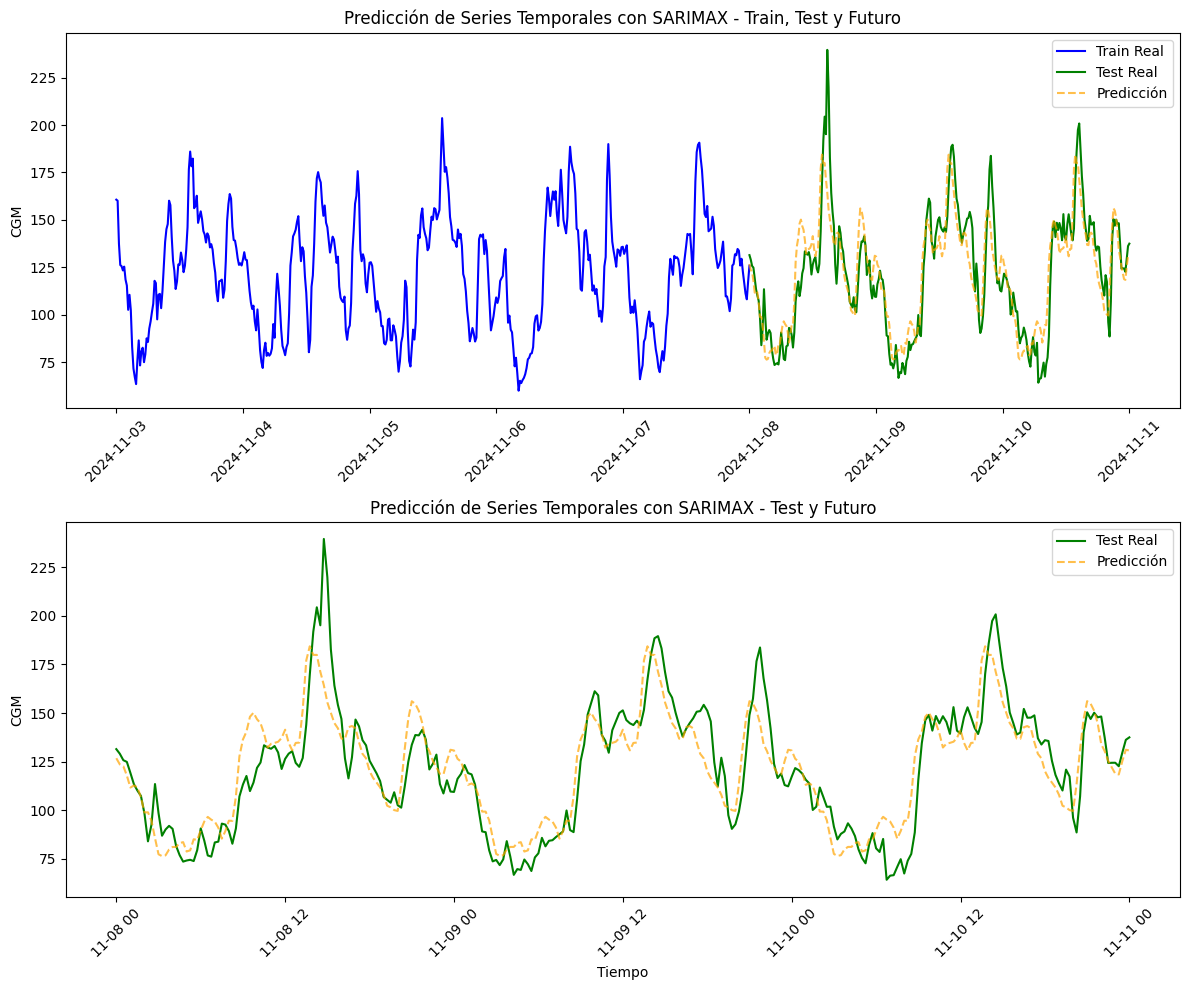


Test MSE: 0.010

Total train and predict time 432000.0


In [82]:
combined_series = pd.concat([train, test])
combined_series = combined_series[~combined_series.index.duplicated(keep='first')]
test_model = sm.tsa.SARIMAX(combined_series, order=pdq, seasonal_order=PDQm)
test_model_fit = test_model.filter(train_model_fit.params)

train_size = len(train)
test_size = len(test)
train_predict_start_time = train.index[0]
train_predict_end_time = train.index[-1]

predict_test = test_model_fit.get_prediction(start=train_size, end=train_size + test_size - 1, dynamic=True)
predicted_mean = predict_test.predicted_mean

predictions = predicted_mean.tolist()

mean_square = mean_squared_error(test, predictions)
print('\nTest MSE: %.3f' % mean_square)

train_predict_total_time = (train_predict_end_time - train_predict_start_time).total_seconds()
print('\nTotal train and predict time %.1f' % train_predict_total_time)

test_ultimos_dias = test
predictions_ultimos_dias = pd.Series(predictions, index=test.index)

import matplotlib.pyplot as plt
import pandas as pd

predictions_series = pd.Series(predictions, index=test.index)

forecast_steps = 4

forecast = test_model_fit.get_forecast(steps=forecast_steps)

forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

forecast_index = pd.date_range(start=test.index[-1] + pd.Timedelta(minutes=15), periods=forecast_steps, freq='15T')

forecast_series = pd.Series(forecast_mean, index=forecast_index)

forecast_ci_series_lower = pd.Series(forecast_ci.iloc[:, 0].values, index=forecast_index)
forecast_ci_series_upper = pd.Series(forecast_ci.iloc[:, 1].values, index=forecast_index)

combined_predictions = pd.concat([predictions_series, forecast_series])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# Primer subplot - Visualización de Train y Test junto con la predicción futura
ax1.plot(train.index, scaler.inverse_transform(train.values.reshape(-1, 1)), label='Train Real', color='blue')
ax1.plot(test.index, scaler.inverse_transform(test.values.reshape(-1, 1)), label='Test Real', color='green')
ax1.plot(predictions_series.index, scaler.inverse_transform(predictions_series.values.reshape(-1, 1)),
         label='Predicción', linestyle='--', color='orange', alpha=0.7)
#ax1.plot(forecast_series.index, scaler.inverse_transform(forecast_series.values.reshape(-1, 1)),label='Predicción Futuro', linestyle='-', color='black', alpha=1)
#ax1.fill_between(forecast_ci_series_lower.index, scaler.inverse_transform(forecast_ci_series_lower.values.reshape(-1, 1)).flatten(),scaler.inverse_transform(forecast_ci_series_upper.values.reshape(-1, 1)).flatten(), color='k', alpha=0.1)

ax1.legend()
ax1.set_title('Predicción de Series Temporales con SARIMAX - Train, Test y Futuro')
ax1.set_ylabel('CGM')
ax1.tick_params(axis='x', rotation=45)

# Segundo subplot - Solo Test y las predicciones futuras
ax2.plot(test.index, scaler.inverse_transform(test.values.reshape(-1, 1)), label='Test Real', color='green')
ax2.plot(predictions_series.index, scaler.inverse_transform(predictions_series.values.reshape(-1, 1)),
         label='Predicción', linestyle='--', color='orange', alpha=0.7)
#ax2.plot(forecast_series.index, scaler.inverse_transform(forecast_series.values.reshape(-1, 1)),label='Predicción Futuro', linestyle='-', color='black', alpha=1)
#ax2.fill_between(forecast_ci_series_lower.index, scaler.inverse_transform(forecast_ci_series_lower.values.reshape(-1,1)).flatten(),scaler.inverse_transform(forecast_ci_series_upper.values.reshape(-1, 1)).flatten(), color='k', alpha=0.1)
ax2.legend()
ax2.set_title('Predicción de Series Temporales con SARIMAX - Test y Futuro')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('CGM')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

mean_square = mean_squared_error(test, predictions)
print('\nTest MSE: %.3f' % mean_square)

train_predict_total_time = (train_predict_end_time - train_predict_start_time).total_seconds()
print('\nTotal train and predict time %.1f' % train_predict_total_time)


In [83]:
import plotly.graph_objects as go

train_real = scaler.inverse_transform(train.values.reshape(-1, 1)).flatten()
test_real = scaler.inverse_transform(test.values.reshape(-1, 1)).flatten()
predictions_real = scaler.inverse_transform(predictions_series.values.reshape(-1, 1)).flatten()
forecast_real = scaler.inverse_transform(forecast_series.values.reshape(-1, 1)).flatten()

fig = go.Figure()

fig.add_trace(go.Scatter(x=train.index, y=train_real, mode='lines', name='Train Real', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test.index, y=test_real, mode='lines', name='Test Real', line=dict(color='green')))
fig.add_trace(go.Scatter(x=predictions_series.index, y=predictions_real, mode='lines', name='Predicción', 
                         line=dict(color='orange', dash='dash')))
fig.add_trace(go.Scatter(x=forecast_series.index, y=forecast_real, mode='lines', name='Predicción Futuro',
                         line=dict(color='black')))

fig.add_trace(go.Scatter(x=forecast_ci_series_lower.index, 
                         y=scaler.inverse_transform(forecast_ci_series_lower.values.reshape(-1, 1)).flatten(),
                         mode='lines', name='Límite Inferior', line=dict(color='gray', dash='dot'), showlegend=False))
fig.add_trace(go.Scatter(x=forecast_ci_series_upper.index, 
                         y=scaler.inverse_transform(forecast_ci_series_upper.values.reshape(-1, 1)).flatten(),
                         mode='lines', name='Límite Superior', line=dict(color='gray', dash='dot'), showlegend=False))

fig.add_trace(go.Scatter(
    x=forecast_ci_series_lower.index.tolist() + forecast_ci_series_upper.index.tolist()[::-1],
    y=(scaler.inverse_transform(forecast_ci_series_lower.values.reshape(-1, 1)).flatten().tolist() + 
       scaler.inverse_transform(forecast_ci_series_upper.values.reshape(-1, 1)).flatten().tolist()[::-1]),
    fill='toself',
    fillcolor='rgba(128, 128, 128, 0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='Intervalo de Confianza',
    showlegend=False
))

fig.update_layout(
    title="Predicción de Series Temporales con SARIMAX",
    xaxis_title="Tiempo",
    yaxis_title="CGM",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    template="plotly_white"
)

fig.show()


Epoch [1/5], Loss: 0.0035
Epoch [2/5], Loss: 0.0039
Epoch [3/5], Loss: 0.0034
Epoch [4/5], Loss: 0.0033
Epoch [5/5], Loss: 0.0035


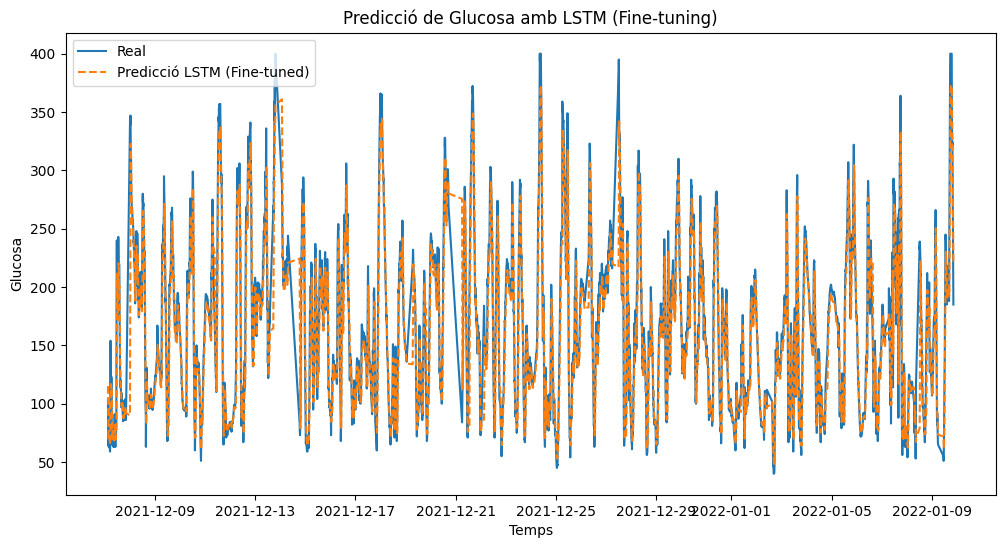

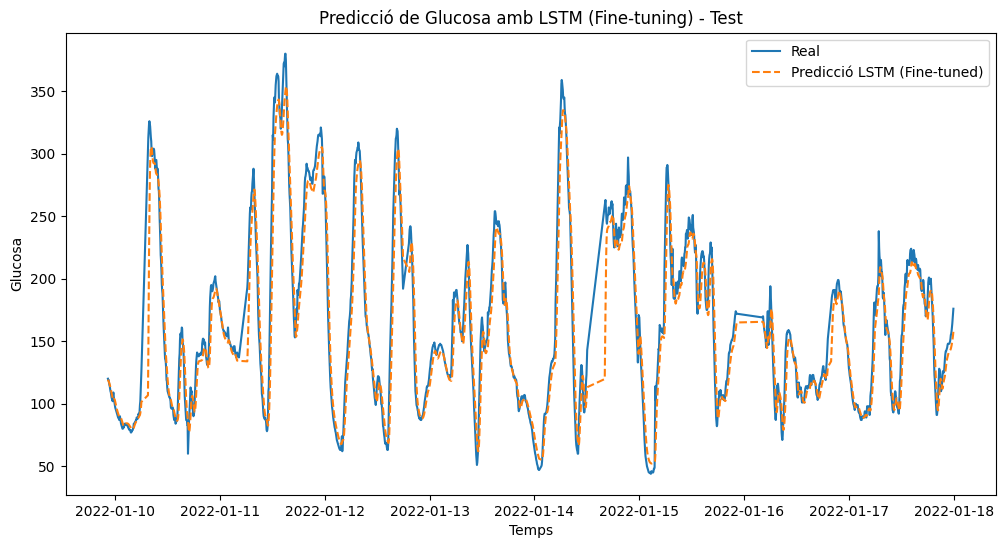

In [33]:
import xml.etree.ElementTree as ET
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Carregar el fitxer XML
tree = ET.parse('../data/raw/OhioT1DM_2018/559-ws-training.xml')  # Confirma la ruta
root = tree.getroot()

data = []

for event in root.find('glucose_level'):
    timestamp = event.get('ts')
    value = float(event.get('value'))
    data.append({'timestamp': timestamp, 'value': value})
    
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%Y %H:%M:%S')  # Ajusta el format
df.set_index('timestamp', inplace=True)

scaler = MinMaxScaler()
df['glucose'] = scaler.fit_transform(df[['value']])

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# Crear seqüències d'entrada
SEQ_LENGTH = 20  # O la longitud que utilitzes en el teu entrenament
X_real, y_real = create_sequences(train_data['glucose'].values, SEQ_LENGTH)

X_real = X_real.reshape(-1, SEQ_LENGTH, 1)

# Convertir a tensors de PyTorch
X_real_tensor = torch.FloatTensor(X_real)
y_real_tensor = torch.FloatTensor(y_real)

# Congelar les capes inicials del model (si vols només entrenar les últimes capes)
for param in model.lstm.parameters():
    param.requires_grad = False  # Congelar els pesos de la capa LSTM

# Entrenar només la capa de sortida
for param in model.fc.parameters():
    param.requires_grad = True  # Deixa entrenar la capa Fully Connected (FC)

# Definir la funció de pèrdua i l'optimitzador
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.01)

# Entrenament per al fine-tuning
epochs = 5
for epoch in range(epochs):
    model.train()  # Mode d'entrenament
    optimizer.zero_grad()  # Reiniciar els gradients
    
    y_pred = model(X_real_tensor)
    
    loss = criterion(y_pred.squeeze(), y_real_tensor)
    
    # Backpropagation i actualització de pesos
    loss.backward()
    optimizer.step()
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

model.eval()

with torch.no_grad():
    y_pred = model(X_real_tensor)

y_pred_inv = scaler.inverse_transform(y_pred.numpy().reshape(-1, 1))  # Remodelar a 2D
y_real_inv = scaler.inverse_transform(y_real_tensor.numpy().reshape(-1, 1))  # Remodelar a 2D

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data.index[SEQ_LENGTH:], y_real_inv, label='Real')
plt.plot(train_data.index[SEQ_LENGTH:], y_pred_inv, label='Predicció LSTM (Fine-tuned)', linestyle='--')
plt.legend()
plt.title('Predicció de Glucosa amb LSTM (Fine-tuning)')
plt.xlabel('Temps')
plt.ylabel('Glucosa')
plt.show()


X_test, y_test = create_sequences(test_data['glucose'].values, SEQ_LENGTH)

X_test = X_test.reshape(-1, SEQ_LENGTH, 1)

X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

model.eval()

with torch.no_grad():
    y_pred_test = model(X_test_tensor)

y_pred_test_inv = scaler.inverse_transform(y_pred_test.numpy().reshape(-1, 1))  # Remodelar a 2D
y_test_inv = scaler.inverse_transform(y_test_tensor.numpy().reshape(-1, 1))  # Remodelar a 2D

plt.figure(figsize=(12, 6))
plt.plot(test_data.index[SEQ_LENGTH:], y_test_inv, label='Real')  # Dades reals de test
plt.plot(test_data.index[SEQ_LENGTH:], y_pred_test_inv, label='Predicció LSTM (Fine-tuned)', linestyle='--') 
plt.legend()
plt.title('Predicció de Glucosa amb LSTM (Fine-tuning) - Test')
plt.xlabel('Temps')
plt.ylabel('Glucosa')
plt.show()


/var/folders/mc/zlqytgf56zgf5kg0s1ld980m0000gn/T/ipykernel_1883/2470065590.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper right')


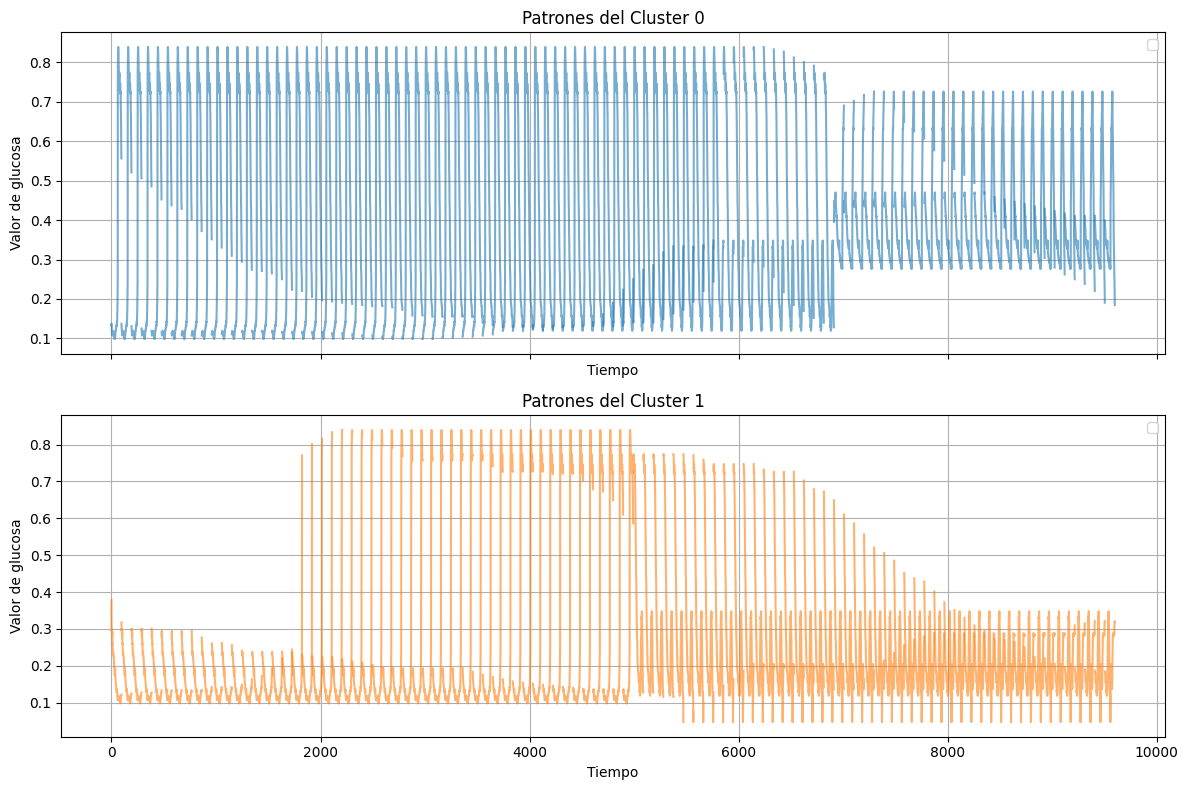

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.fft import fft

data = test_data['glucose'].values  # Datos de glucosa de test

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data.reshape(-1, 1))

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]  
        y = data[i + seq_length]  
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 12*8  
X, y = create_sequences(data_normalized, SEQ_LENGTH)

# Redimensionar para LSTM (3D: batch_size, seq_length, input_size)
X = X.reshape(-1, SEQ_LENGTH)

def fourier_transform(series):
    fft_values = fft(series)  
    magnitude = np.abs(fft_values)  
    return magnitude[:SEQ_LENGTH//2] 
features = np.array([fourier_transform(X[i]) for i in range(len(X))])

kmeans = KMeans(n_clusters=2, random_state=42)  # Número de clusters a definir
kmeans.fit(features)

labels = kmeans.labels_

num_clusters = len(np.unique(labels))

fig, axes = plt.subplots(num_clusters, 1, figsize=(12, 8), sharex=True)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']

for cluster_id in np.unique(labels):
    cluster_indices = np.where(labels == cluster_id)[0]  # Índices de los patrones en este clúster
    
    cluster_indices = cluster_indices[:100]
    
    offset = 0
    
    ax = axes[cluster_id]
    
    for i, index in enumerate(cluster_indices):
        ax.plot(np.arange(offset, offset + SEQ_LENGTH), X[index].flatten(), color=colors[cluster_id], alpha=0.6)
        
        offset += SEQ_LENGTH
    
    ax.set_title(f'Patrones del Cluster {cluster_id}')
    ax.set_xlabel('Tiempo')
    ax.set_ylabel('Valor de glucosa')
    ax.grid(True)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [75]:
test_data

value   glucose
timestamp                           
2022-01-09 20:40:00  171.0  0.363889
2022-01-09 20:45:00  151.0  0.308333
2022-01-09 20:50:00  144.0  0.288889
2022-01-09 20:55:00  143.0  0.286111
2022-01-09 21:00:00  145.0  0.291667
...                    ...       ...
2022-01-17 23:36:00  161.0  0.336111
2022-01-17 23:41:00  164.0  0.344444
2022-01-17 23:46:00  168.0  0.355556
2022-01-17 23:51:00  172.0  0.366667
2022-01-17 23:56:00  176.0  0.377778

[2160 rows x 2 columns]

In [76]:
60/5

12.0